<a href="https://colab.research.google.com/github/Abdulnaser98/candy_power_ranking/blob/main/Lidl_Vorstellungsgespr%C3%A4ch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotheken importieren

In [80]:
# Standard library imports
import os
import warnings

# Data manipulation and analysis
import numpy as np
import pandas as pd
import scipy.stats as stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and analysis
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

# Factor analysis and statistical tests
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# Additional machine learning metrics
from sklearn.metrics import mean_squared_error

# Prince library for MCA, FAMD, etc.
import prince

# Suppress warnings
warnings.filterwarnings('ignore')


In [81]:
from google.colab import drive
drive.mount("/content/gdrive" )

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [82]:
 %cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


# Hilfsfunktionen

In [83]:
# Function to calculate and plot percentages
def plot_feature_percentages(data, features, title_suffix):
    # Calculate the percentage of 1's for each column
    percentage_of_ones = (data[features].sum() / len(data[features])) * 100

    # Sort the percentages
    sorted_percentages = percentage_of_ones.sort_values(ascending=False)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sorted_percentages.plot(kind='bar', color='orange')  # Change color to orange

    # Customize the plot
    plt.title(f'Percentage of each Feature in the data - {title_suffix}')
    plt.xlabel('Features')
    plt.ylabel('Prozentsatz(%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.grid(axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Daten importieren


In [84]:
candy_data = pd.read_csv('candy-data.csv')
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


# Datenexploration


In [85]:
features = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
print(f"Die Daten haben die Form {candy_data.shape}")
total_null_values = candy_data.isnull().sum().sum()
print(f"Gesamtanzahl der Nullwerte im Candy-Datensatz: {total_null_values}")

Die Daten haben die Form (85, 13)
Gesamtanzahl der Nullwerte im Candy-Datensatz: 0


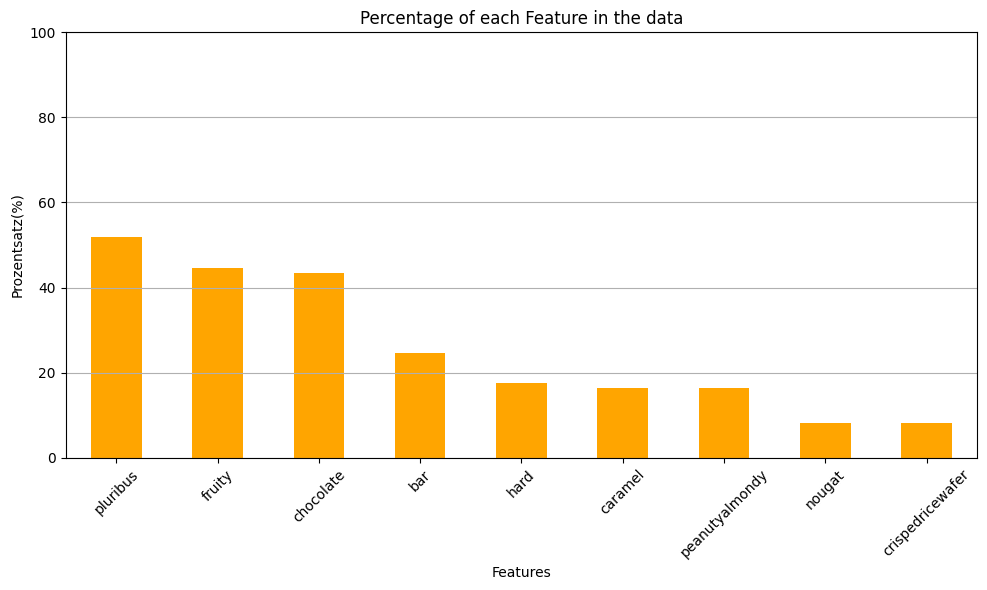

In [8]:
# Calculate the percentage of 1's for each column
percentage_of_ones = (candy_data[features].sum() / len(candy_data[features])) * 100

# Sort the percentages
sorted_percentages = percentage_of_ones.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_percentages.plot(kind='bar', color='orange')  # Change color to red

# Customize the plot
plt.title('Percentage of each Feature in the data')  # New title
plt.xlabel('Features')
plt.ylabel('Prozentsatz(%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


**Hauptgeschmack:**

- Schokoladen- und Fruchtgeschmack sind etwa gleich verteilt.
  - Etwa **44 %** sind fruchtig.
  - Etwa **43 %** enthalten Schokolade.

**Andere Geschmacksrichtungen:**
- Karamell und Erdnuss- und Mandelgeschmack sind gleich verteilt (16 %).
- Nougat und Crisped-Rice-Waffeln sind ebenfalls gleich verteilt (0,08 %).

**Form:**
- Etwa **50 %** der Süßigkeiten liegen in Pluribus-Form vor.
- Etwa **24 %** sind in Riegelform erhältlich.

**Andere Eigenschaften:**
- Etwa **17 %** sind hart.

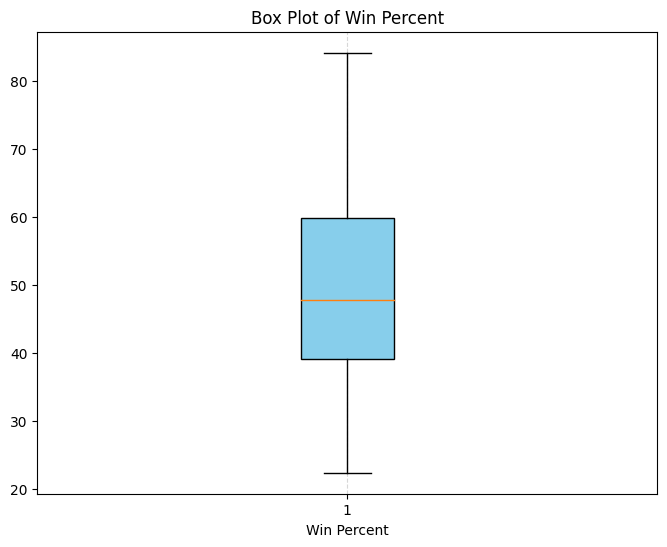

In [9]:
plt.figure(figsize=(8, 6))
plt.boxplot(candy_data['winpercent'], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title('Box Plot of Win Percent')
plt.xlabel('Win Percent')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


- Im Durchschnitt liegt der Gewinnprozentsatz bei etwa **50,32%**.
- Der niedrigste beobachtete Gewinnprozentsatz beträgt **22,45%**.
- Ein Viertel der Gewinnprozentsätze liegt unter **39,14%**.
- Bei der Hälfte der Datenpunkte liegt der Gewinnprozentsatz unter **47,8%**, bei der anderen Hälfte darüber.
- Nur **25%** der Daten weisen Gewinnprozentsätze über **59,86 %** auf.
- Der höchste beobachtete Gewinnprozentsatz beträgt **84,18%**.

## Korrelationsmatrix


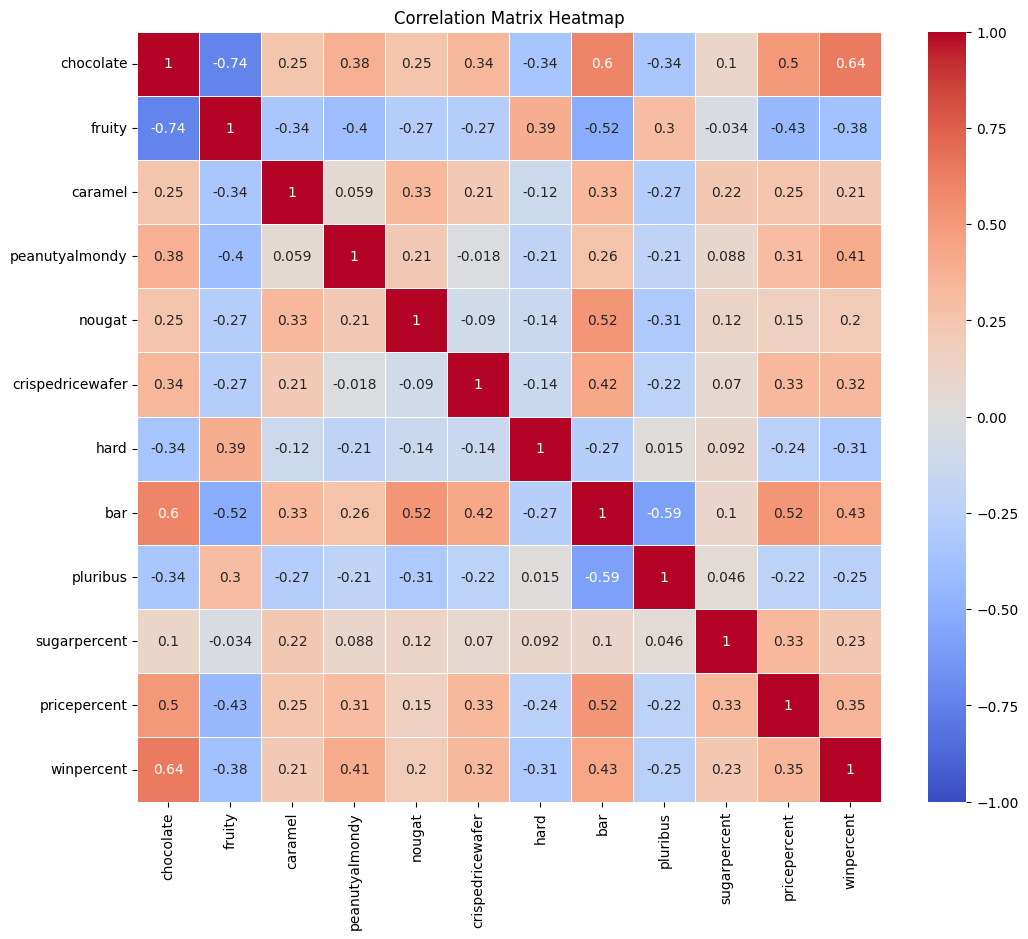

In [10]:
candy_data.drop(columns=['competitorname'], inplace=True)
correlation_matrix = candy_data.corr()
# Set the figure size for the heatmap
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the heatmap
plt.show()


**Positive** Korrelationen:

**Geschmack:**
*   **Schokolade** st der größte Beitrag zur Gewinnwahrscheinlichkeit mit einem **Korrelationswert** von **0,64**.

*   **Peanutyalmondy** and **Crispedricewafer** and **Karamell** weisen ebenfalls **positive** Korrelationen auf.

**Form:**
*   Die Form **Riegel(bar)** zeigt eine **positive** Korrelation.



**Negative** corrleations:

**Geschmack**:
*   **Fruchtig** ist negativ mit der Gewinnwahrscheinlichkeit korreliert **(-0,38)**. Das bedeutet, dass die Kunden weniger zufrieden mit Süßigkeiten sind, die Früchte enthalten, da sie Schokolade bevorzugen. **Schokolade schließt sich mit Früchten aus**, da es auch eine **starke negative** Korrelation mit dem Geschmack Schokolade gibt.

**Form**:
* **Hard** and **pluribus**



## Fragen

###1) Was sind die Eigenschaften der Top 10 Süßigkeiten mit der höchsten Gewinnwahrscheinlichkeit?


In [49]:
candy_data = candy_data.sort_values(by='winpercent', ascending=False)
candy_data.head(10)['competitorname']

,competitorname
52,Reese's Peanut Butter cup
51,Reese's Miniatures
79,Twix
28,Kit Kat
64,Snickers
53,Reese's pieces
36,Milky Way
54,Reese's stuffed with pieces
32,Peanut butter M&M's
42,Nestle Butterfinger


*  **40%** gehören zur firma **Reese**.
*  Die bekannten **Twix**, **Kit Kat** und **Snickers** sind in den Top 10 vertreten.





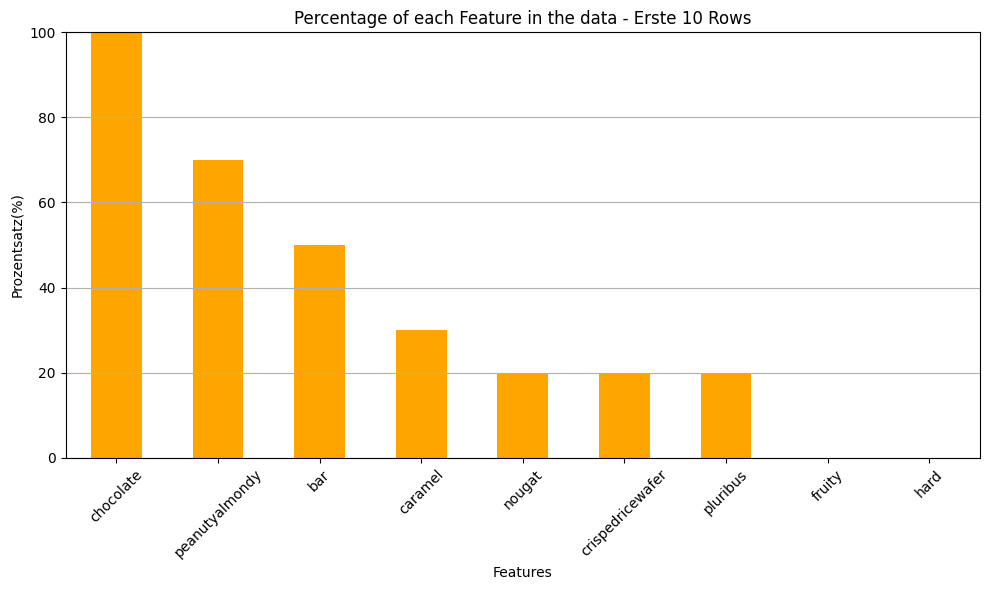

In [62]:
# Plot for the first 10 rows
plot_feature_percentages(candy_data.head(10), features, "Erste 10 Rows")

*  **Alle** von ihnen enthalten **Schokolade**
*  **70%** enthalten **Peanutyalmondy**
*  **50%** kommen in **Riegelform**
*  **20%** kommen in **Pluribus-Form**
*  **Keines** ist **hart**
*  **keines** hat **Fruchtgeschmack**

In [53]:
candy_data.head(10)['pricepercent'].mean()

0.636900015

* Die meisten der **Top 10** Süßigkeiten sind **moderat** preislich, da sie durschnittlich teurer sind als etwa **65,1%** der anderen Süßigkeiten.

###2) Was sind die Eigenschaften der 10 Süßigkeiten mit der niedrigsten Gewinnwahrscheinlichkeit?


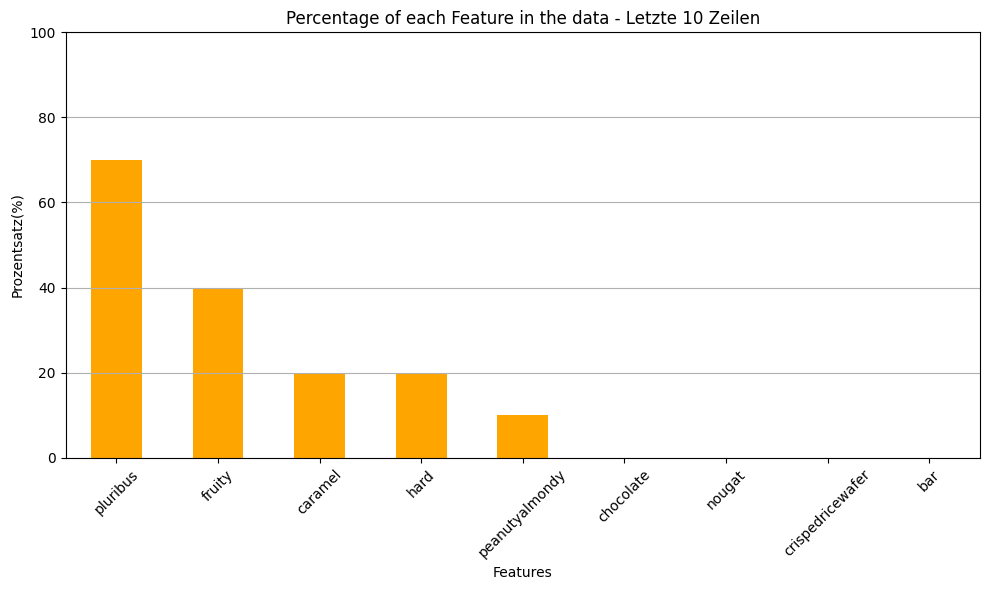

In [63]:
# Plot for the last 10 rows
plot_feature_percentages(candy_data.tail(10), features, "Letzte 10 Zeilen")

*   **Keine** enthält **Schokolade**
*   **Keine** kommt in **Riegelform**
*   **40%** enthalten **fruchtige** Komponenten.
*   **70%** kommen in **Pluribus-Form**
*   **20%** sind **hart**



###3) Gibt es Süßigkeiten, die fruchtbasiert sind und eine überdurchschnittliche Gewinnwahrscheinlichkeit haben?



In [59]:
frage_3 = candy_data.loc[(candy_data['fruity']==1) & (candy_data['winpercent']>=50.0)]
frage_3['competitorname']

,competitorname
68,Starburst
60,Skittles original
66,Sour Patch Kids
18,Haribo Gold Bears
41,Nerds
61,Skittles wildberry
73,Swedish Fish
31,Lifesavers big ring gummies
67,Sour Patch Tricksters
4,Air Heads


Es gibt 11 Süßigkeiten, die **fruchtbasiert** sind und eine gute Gewinnwahrscheinlichkeit von über 50 % haben.
*   **Starburst** ist die beste Süßigkeit.
*   Die Marke **Skittles** scheint beliebt zu sein.





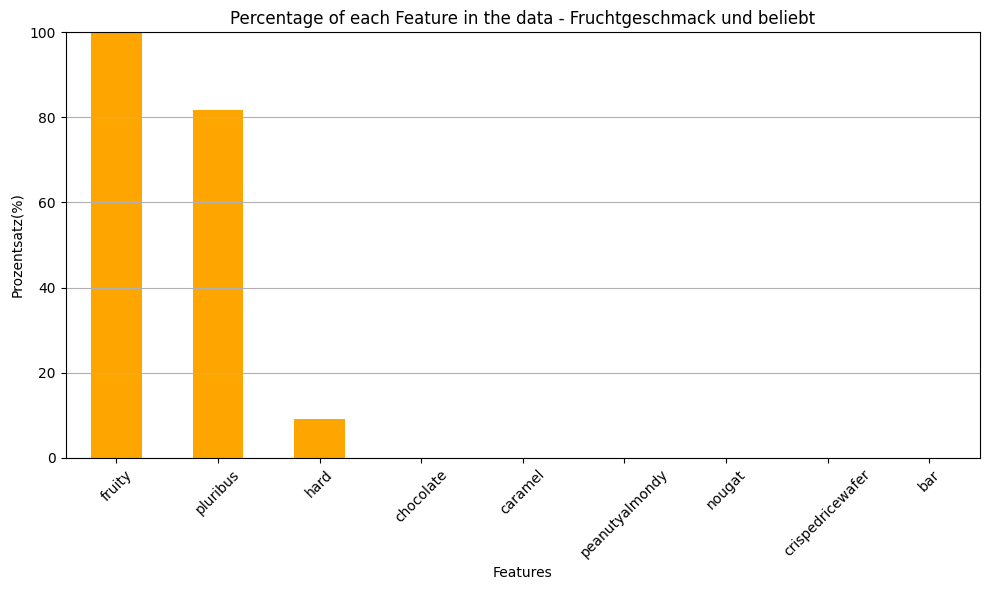

In [64]:
# Plot for the last 10 rows
plot_feature_percentages(frage_3, features, "Fruchtgeschmack und beliebt")

*   Die Mehrheit hat die Form **Pluribus**.
*   Es gibt absolut keine anderen Geschmacksrichtungen wie **Karamell**, **Erdnuss- und Mandelgeschmack** oder **Nougat**.

In [61]:
frage_3['pricepercent'].mean()

0.33563636181818185

Es könnte etwas mit dem Preis zu tun haben, da ihr **Preisanteil** in den meisten Fällen **niedrig** ist.


###4) Gibt es Süßigkeiten, die schokoladenbasiert sind und eine schlechte Gewinnwahrscheinlichkeit haben?


In [65]:
candy_data.loc[(candy_data['chocolate']==1) & (candy_data['winpercent']<50.0)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
77,Tootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465,0.325,49.653503,2
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113,1
74,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651,0
39,Mounds,1,0,0,0,0,0,0,1,0,0.313,0.860,47.829754,2
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748,1
75,Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313,0.511,43.068897,1
10,Charleston Chew,1,0,0,0,1,0,0,1,0,0.604,0.511,38.975037,2
62,Nestle Smarties,1,0,0,0,0,0,0,0,1,0.267,0.976,37.887188,1
59,Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,34.722000,1


*   **4/9** belong to the company **Tootsie**
*   **Keine** von ihnen haben **Karamell** oder **Erdnuss- und Mandelgeschmack**.
*   Nur **eine** hat **Nougat**.
*   **Die meisten** von ihnen haben einen **niedrigen Zuckergehalt**.


### 5) Wie variiert **'winpercent'** in den verschiedenen Kategorien (z. B. schokoladenbasierte vs. fruchtige Süßigkeiten)?


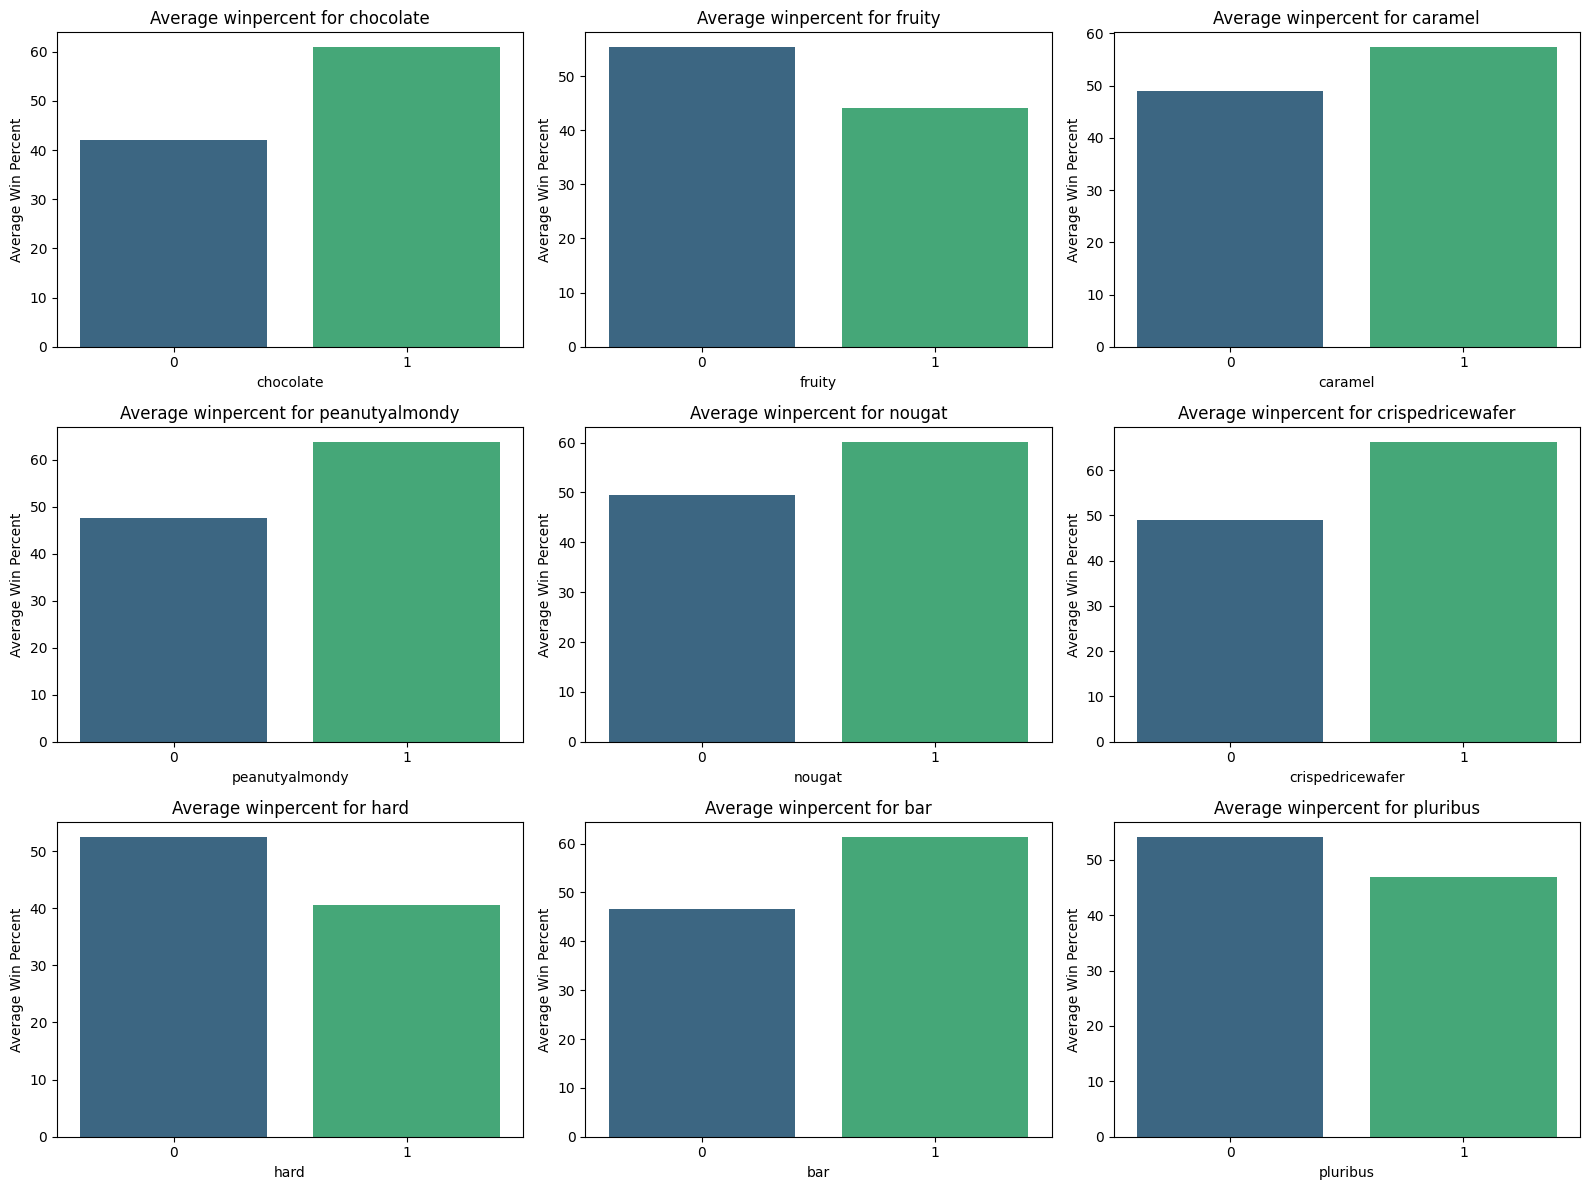

In [66]:
# Create a figure for subplots
plt.figure(figsize=(16, 12))

# Loop through each feature and create a bar plot
features = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)  # Arrange subplots in a 3x3 grid
    feature_means = candy_data.groupby(feature)['winpercent'].mean().reset_index()

    # Create the bar plot
    sns.barplot(x=feature, y='winpercent', data=feature_means, palette='viridis')
    plt.title(f'Average winpercent for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Win Percent')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Die Ergebnisse **korrelieren** mit den Ergebnissen der **Korrelationsmatrix**.

### Schokolade mit Peanutyalmondy (beide haben eine positive Korrelation zueinander)

In [67]:
candy_data.loc[(candy_data['chocolate']== 1)]['winpercent'].mean()

60.92152940540543

Eine gute überdurchschnittliche Gewinnrate, wenn die Süßigkeit Schokolade enthält

In [68]:
candy_data.loc[(candy_data['chocolate']== 1) & (candy_data['peanutyalmondy']==1)]['winpercent'].mean()

68.50379116666666

Eine bessere durchschnittliche Gewinnrate, wenn die Süßigkeiten Schokolade und Nüsse enthalten

In [69]:
candy_data.loc[(candy_data['chocolate']== 0) & (candy_data['peanutyalmondy']==0)]['winpercent'].mean()

42.45899815217392

Eine unterdurchschnittliche Gewinnrate, wenn die Süßigkeit weder Schokolade noch Nüsse enthält

### Frucht mit hart(beide haben eine positive Korrelation zueinander)

In [70]:
candy_data.loc[(candy_data['fruity']== 1)]['winpercent'].mean()

44.11974142105264

Eine unterdurchschnittliche Gewinnrate, wenn die Süßigkeit Früchte enthält

In [71]:
candy_data.loc[(candy_data['fruity']== 1) & (candy_data['hard']==1)]['winpercent'].mean()

41.23282523076922

Eine noch schlechtere Gewinnrate, wenn die Süßigkeit Früchte enthält und hart ist

In [72]:
candy_data.loc[(candy_data['fruity']== 0)]['winpercent'].mean()

55.32712234042554

Eine überdurchschnittliche Gewinnrate, wenn die Süßigkeit keine Früchte enthält

In [73]:
candy_data.loc[(candy_data['fruity']== 0) & (candy_data['hard']==0)]['winpercent'].mean()

56.19481668888889

Eine noch bessere Gewinnrate, wenn die Süßigkeit keine Früchte enthält und nicht hart ist

### fruity mit pluribus

In [74]:
candy_data.loc[(candy_data['fruity']== 1) & (candy_data['pluribus']==1)]['winpercent'].mean()

45.444135

Eine Süßigkeit mit Fruchtgeschmack und der Form 'pluribus' weist eine Gewinnrate von 45% auf.

In [75]:
candy_data.loc[(candy_data['fruity']== 1) & (candy_data['pluribus']==0)]['winpercent'].mean()

41.250221999999994

Eine Süßigkeit mit Fruchtgeschmack , die nicht in der Form 'pluribus' vorliegt, hat eine geringere Gewinnrate von 41%

###6) Gibt es Süßigkeiten, die teuer sind, aber eine schlechte Gewinnrate haben?

In [76]:
candy_data.loc[(candy_data['pricepercent']>0.75) & (candy_data['winpercent']<50.0)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113,1
39,Mounds,1,0,0,0,0,0,0,1,0,0.313,0.860,47.829754,2
46,Payday,0,0,0,1,1,0,0,1,0,0.465,0.767,46.296597,2
49,Pop Rocks,0,1,0,0,0,0,1,0,1,0.604,0.837,41.265511,0
62,Nestle Smarties,1,0,0,0,0,0,0,0,1,0.267,0.976,37.887188,1
55,Ring pop,0,1,0,0,0,0,1,0,0,0.732,0.965,35.290756,0
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550,1
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341,0


* 2 der 3 Süßigkeiten, die Schokolade enthalten, kommen in Pluribus-Form, die bei den Kunden nicht beliebt ist.
* Nur eine davon enthält Schokolade und liegt in Riegelform vor.
* 3 enthalten Früchte
* 62 % kommen in Pluribus-Form
* Nur eine davon hat Karamell.
* Nur eine davon hat Erdnuss- und Mandelgeschmack sowie Nougat.
* Nur eine davon enthält Crisped-Rice-Waffeln.


###7) Gibt es Süßigkeiten, die billig sind, aber eine gute Gewinnrate haben?

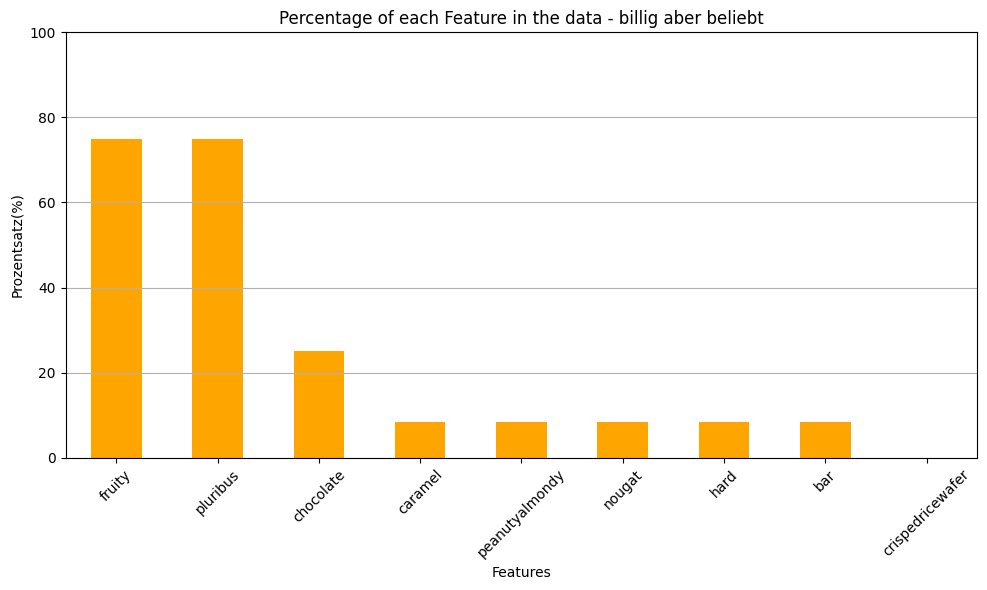

In [77]:
frage_7 = candy_data.loc[(candy_data['pricepercent']<0.50) & (candy_data['winpercent']>50.0)]

# Plot for the last 10 rows
plot_feature_percentages(frage_7, features, "billig aber beliebt")


* Die meisten von ihnen haben den Geschmack **fruchtig** und die Form **Pluribus**(diese Kombination scheint bei den Verbrauchern beliebt zu sein)
* Die höchsten Gewinnwahrscheinlichkeiten gehören der Süßigkeit mit dem **Schokoladengeschmack** und der **Nuss-Note** **'Reese's Miniatures'**

# Dimensionsreduktion

Erklärte Varianzverhältnis: [0.39958326 0.09968726 0.09643564 0.08942445 0.06987235 0.05372553
 0.05118369 0.04415201 0.03540164 0.03068839 0.01602548 0.01268419
 0.00113609]


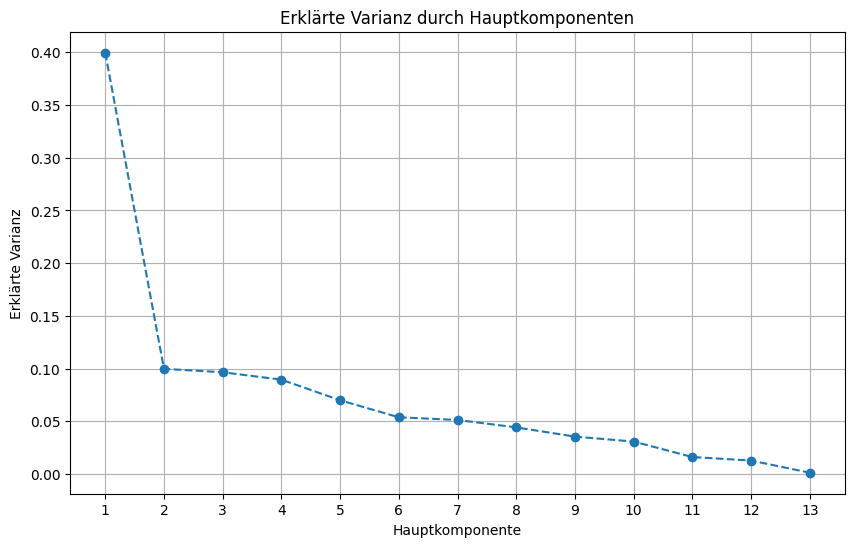

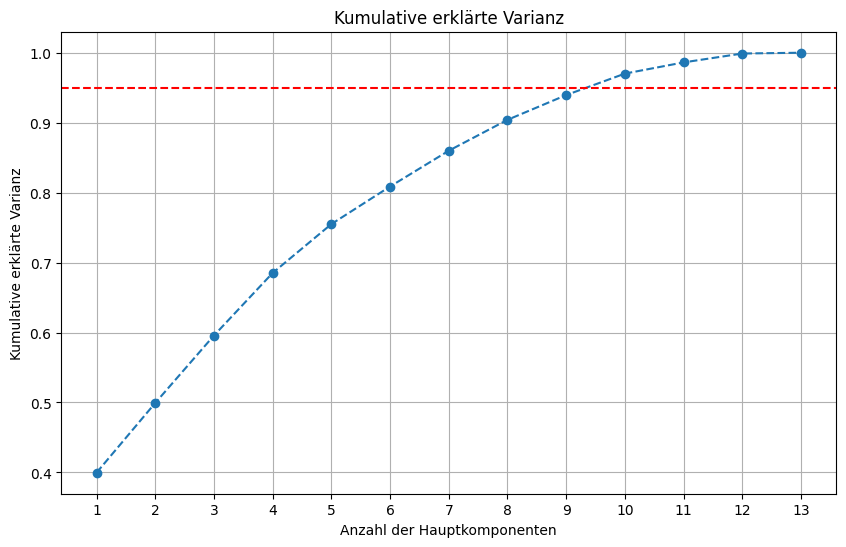

In [ ]:
candy_data_pca = candy_data.drop(columns=['competitorname'])
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
standardized_features = scaler.fit_transform(candy_data_pca)

# Convert to DataFrame
standardized_df = pd.DataFrame(standardized_features, columns=candy_data_pca.columns)

# Apply PCA
pca = PCA()
pca.fit(standardized_df)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Erklärte Varianzverhältnis:", explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Erklärte Varianz durch Hauptkomponenten')
plt.xlabel('Hauptkomponente')
plt.ylabel('Erklärte Varianz')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Kumulative erklärte Varianz')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulative erklärte Varianz')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% threshold
plt.grid()
plt.show()

* Wir benötigen etwa 9 Hauptkomponenten, um 95 % der Varianz erklären zu können.

* An dieser Stelle ist es **nicht sinnvoll**, eine Dimensionsreduktion anzuwenden.

# Clustering

## Bestimmung die Anzahl der Clusters

In [34]:
candy_data_clusters = candy_data.drop(columns=['competitorname','sugarpercent','pricepercent','winpercent'])

Elbow-methode

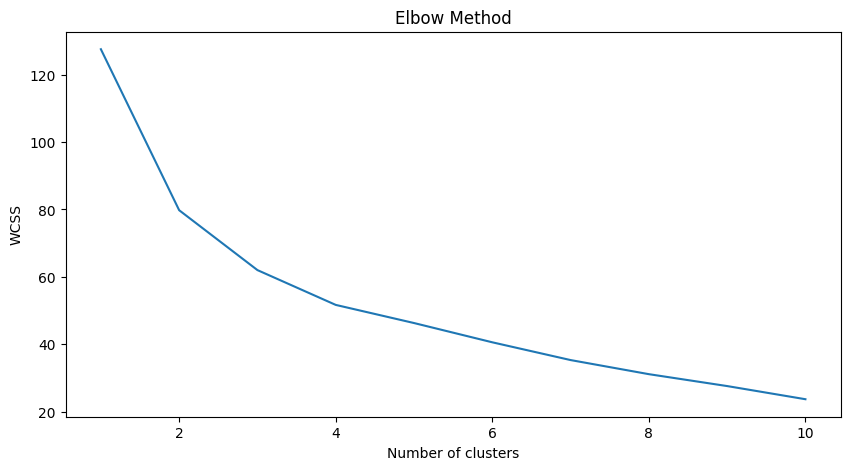

In [35]:
# Sample scaled data from your previous DataFrame
wcss = []
for i in range(1, 11):  # Testing from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(candy_data_clusters)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Silhouette_score

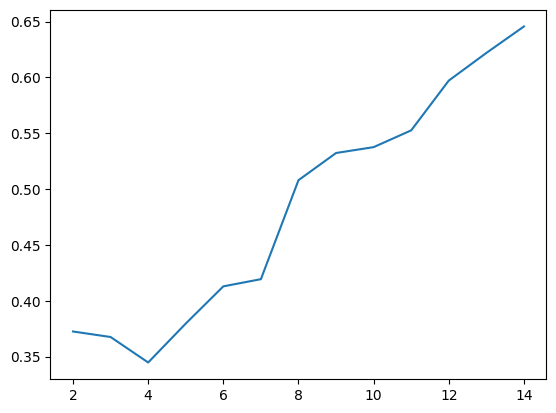

In [48]:
# silhouette scores to choose number of clusters.
from sklearn.metrics import silhouette_score
def sil_score(df):
    sse_ = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=123).fit(candy_data_clusters) # fit.
        sse_.append([k, silhouette_score(df, kmeans.labels_)])
    plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

sil_score(candy_data_clusters)

* Bei der Anwendung der **Elbow-Methode** könnte die optimale Anzahl der Cluster bei 2 oder 3 liegen.

* Bei der Verwendung der **Silhouette-Score-Methode** ist die optimale Clusteranzahl nicht eindeutig. Daher beginnen wir zunächst mit 2 Clustern und testen anschließend andere Clusteranzahlen.

## Clusters erzeugen

### **2** Clusters erzeugen

In [37]:
 # Step 3: Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Choose the number of clusters (3 in this case)
candy_data['cluster'] = kmeans.fit_predict(candy_data_clusters)

#### **Cluster 1:**

In [39]:
candy_data.loc[candy_data['cluster']==1].describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
count,38.000000,38.0,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,0.947368,0.0,0.289474,0.342105,0.184211,0.184211,0.0,0.552632,0.315789,0.505868,0.635711,60.095830,1.0
std,0.226294,0.0,0.459606,0.480783,0.392859,0.392859,0.0,0.503897,0.471069,0.238303,0.248576,13.533829,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.034000,0.011000,32.230995,1.0
25%,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.313000,0.511000,49.827014,1.0
50%,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.465000,0.651000,60.164976,1.0
75%,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.604000,0.857000,70.422678,1.0
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.988000,0.976000,84.180290,1.0


**Hauptgeschmack:**
* Schokolade ⇒ 0.94%
* Fruchtgeschmack ist in diesem Cluster gar nicht vorhanden.

**Andere Geschmacksrichtungen:**
* Karamell, Erdnuss- und Mandelgeschmack sowie Crisped-Rice-Waffeln sind in diesem Cluster gut vertreten
* In diesem Cluster gibt es keine harten Süßwaren.

**Form:**
* Riegelform ist in diesem Cluster gut vertreten.

**Zuckeranteil:**
* Im Durchschnitt 50%.

**Preisanteil:**
* Im Durchschnitt 63%.

**Gewinnwahrscheinlichkeit:**
* Im Durchschnitt 60%.

#### **Cluster 2:**



In [40]:
candy_data.loc[candy_data['cluster']==0].describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
count,47.000000,47.000000,47.000000,47.000000,47.0,47.0,47.000000,47.0,47.000000,47.000000,47.000000,47.000000,47.0
mean,0.021277,0.808511,0.063830,0.021277,0.0,0.0,0.319149,0.0,0.680851,0.456638,0.334000,42.410285,0.0
std,0.145865,0.397727,0.247092,0.145865,0.0,0.0,0.471186,0.0,0.471186,0.315017,0.240445,10.255348,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011000,0.023000,22.445341,0.0
25%,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.174000,0.116000,35.654192,0.0
50%,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.465000,0.325000,41.904308,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,1.000000,0.732000,0.465000,48.077940,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.965000,0.976000,67.037628,0.0


**Hauptgeschmack:**
* Schokolade nur 2%
* Fruchtgeschmack ist in diesem Cluster stark vertreten

**Andere Geschmacksrichtungen:**
* caramel, peanutyalmondy sind kaum vertreten
* Kein Nougat und crispedricewafer
* In diesem Cluster gibt es 31% harten Süßwaren.

**Form:**
* Riegelform ist in diesem Cluster gar nicht vertreten.
* 68% der Süßigkeiten in diesem Cluster liegen in Pluribus-Form vor.

**Zuckeranteil:**
* Im Durchschnitt 45%.

**Preisanteil:**
* Im Durchschnitt 33%.

**Gewinnwahrscheinlichkeit:**
* Im Durchschnitt 42%.

### **3** Clusters erzeugen

In [41]:
 # Step 3: Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters (3 in this case)
candy_data['cluster'] = kmeans.fit_predict(candy_data_clusters)

#### **Cluster 1:**

In [45]:
candy_data.loc[candy_data['cluster']==1].describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
count,24.000000,24.0,24.000000,24.000000,24.0,24.000000,24.0,24.0,24.000000,24.000000,24.000000,24.000000,24.0
mean,0.666667,0.0,0.166667,0.291667,0.0,0.041667,0.0,0.0,0.708333,0.454375,0.484583,51.731795,1.0
std,0.481543,0.0,0.380693,0.464306,0.0,0.204124,0.0,0.0,0.464306,0.333780,0.275595,17.781256,0.0
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.011000,0.011000,23.417824,1.0
25%,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.191250,0.313500,36.972252,1.0
50%,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.359500,0.511000,47.820309,1.0
75%,1.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,1.000000,0.825000,0.651000,67.301886,1.0
max,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.988000,0.976000,84.180290,1.0


**Hauptgeschmack:**
* Schokolade ⇒ 0.66%
* Fruchtgeschmack ist in diesem Cluster gar nicht vorhanden.

**Andere Geschmacksrichtungen:**
* Karamell, Erdnuss- und Mandelgeschmack sind in diesem Cluster leicht vertreten
* Crisped-Rice-Waffeln ist in diesem Cluster kaum vorhanden
* Kein nougat
* In diesem Cluster gibt es keine harten Süßwaren.

**Form:**
* pluribus ist in diesem Cluster gut vertreten(80%)
* Keine Süßigkeiten liegen in Riegelform vor.

**Zuckeranteil:**
* Im Durchschnitt 45%.

**Preisanteil:**
* Im Durchschnitt 48%.

**Gewinnwahrscheinlichkeit:**
* Im Durchschnitt 51%.

#### **Cluster 2:**

In [46]:
candy_data.loc[candy_data['cluster']==0].describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
count,40.000000,40.000000,40.000000,40.0,40.0,40.0,40.00000,40.0,40.000000,40.000000,40.000000,40.000000,40.0
mean,0.025000,0.950000,0.050000,0.0,0.0,0.0,0.37500,0.0,0.675000,0.467450,0.324500,43.703954,0.0
std,0.158114,0.220721,0.220721,0.0,0.0,0.0,0.49029,0.0,0.474342,0.301691,0.239882,10.257698,0.0
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.046000,0.034000,22.445341,0.0
25%,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.194250,0.116000,38.596054,0.0
50%,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,1.000000,0.465000,0.296000,42.560610,0.0
75%,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.00000,0.0,1.000000,0.732000,0.465000,51.644689,0.0
max,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.00000,0.0,1.000000,0.941000,0.976000,67.037628,0.0


**Hauptgeschmack:**
* Fruchtgeschmack ist in diesem Cluster sehr gut.
* kaum chocolate Süßwaren

**Andere Geschmacksrichtungen:**
* kaum Karamell
* Erdnuss- und Mandelgeschmack sowie Crisped-Rice-Waffeln und nougat sind in diesem Cluster gar nicht vertreten
* In diesem Cluster gibt es etwa 37% harten Süßwaren.

**Form:**
* pluribus ist in diesem Cluster gut vertreten(67%)
* Keine Süßigkeiten liegen in Riegelform vor.

**Zuckeranteil:**
* Im Durchschnitt 46%.

**Preisanteil:**
* Im Durchschnitt 32%.

**Gewinnwahrscheinlichkeit:**
* Im Durchschnitt 43%.

#### **Cluster 3:**

In [47]:
candy_data.loc[candy_data['cluster']==2].describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
count,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.0,21.0,21.0,21.000000,21.000000,21.000000,21.0
mean,0.952381,0.0,0.380952,0.333333,0.333333,0.285714,0.0,1.0,0.0,0.527714,0.725952,61.295413,2.0
std,0.218218,0.0,0.497613,0.483046,0.483046,0.462910,0.0,0.0,0.0,0.163573,0.178844,11.142460,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.313000,0.325000,38.975037,2.0
25%,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.430000,0.651000,54.526451,2.0
50%,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.546000,0.767000,60.800701,2.0
75%,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.604000,0.860000,67.602936,2.0
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.965000,0.918000,81.642914,2.0


**Hauptgeschmack:**
* Schokolade sehr stark vertreten(95%)
* Fruchtgeschmack ist in diesem Cluster gar nicht vorhanden.

**Andere Geschmacksrichtungen:**
* Karamell, Erdnuss- und Mandelgeschmack sowie Crisped-Rice-Waffeln und nougat sind in diesem Cluster gut vertreten
* In diesem Cluster gibt es keine harten Süßwaren.

**Form:**
* pluribus ist in diesem Cluster gar nicht vertreten
* 100% der Süßigkeiten in diesem Cluster liegen in Riegelform

**Zuckeranteil:**
* Im Durchschnitt 52%.

**Preisanteil:**
* Im Durchschnitt 72%.

**Gewinnwahrscheinlichkeit:**
* Im Durchschnitt 61%.

# Modellierung

## Linear Regression VS Xgboost

In [33]:
# Assuming candy_data is your DataFrame, start by removing unnecessary columns
df = candy_data.drop(columns=['competitorname', 'sugarpercent', 'pricepercent'])

# Define features (X) and target (y)
X = df.drop(columns=['winpercent'])  # Select all columns except the target
y = df['winpercent']  # Target column

# Generalized function to train and evaluate any model
def evaluate_model(model, X, y, use_cv=False, n_splits=5, is_linear=True):
    if use_cv:
        # Perform cross-validation
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        # Calculate R-squared if the model is linear
        if is_linear:
            r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
            print(f'Cross-validated R-squared scores: {r2_scores}')
            print(f'Average R-squared: {np.mean(r2_scores)}')

        # Calculate Mean Absolute Error (MAE)
        mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
        mae_scores = cross_val_score(model, X, y, cv=kf, scoring=mae_scorer)
        print(f'Cross-validated MAE scores: {-mae_scores}')  # Convert to positive values
        print(f'Average MAE: {np.mean(-mae_scores)}')

        # Calculate Mean Squared Error (MSE)
        mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
        mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
        print(f'Cross-validated MSE scores: {-mse_scores}')  # Convert to positive values
        print(f'Average MSE: {np.mean(-mse_scores)}')

        # Calculate Root Mean Squared Error (RMSE)
        rmse_scores = np.sqrt(-mse_scores)
        print(f'Cross-validated RMSE scores: {rmse_scores}')
        print(f'Average RMSE: {np.mean(rmse_scores)}')

    else:
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate R-squared if the model is linear
        if is_linear:
            r_squared = r2_score(y_test, y_pred)
            print(f'R-squared: {r_squared}')

        # Calculate other accuracy metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        print(f'Mean Absolute Error (MAE): {mae}')
        print(f'Mean Squared Error (MSE): {mse}')
        print(f'Root Mean Squared Error (RMSE): {rmse}')

        # If it's a linear model, display coefficients
        if is_linear:
            coefficients = model.coef_
            feature_names = X.columns
            coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
            print("\nCoefficients of the model:")
            print(coef_df)
        else:
            # For non-linear models like XGBoost, display feature importances
            feature_importances = model.feature_importances_
            feature_names = X.columns
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False)  # Sort by importance
            print("\nFeature Importances of the model:")
            print(importance_df)

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)

# Initialize the XGBoost regression model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Evaluate Ridge Regression using train-test split
print("Evaluation of Ridge Regression without CV:")
evaluate_model(ridge_model, X, y, use_cv=False, is_linear=True)

print("============================================================================================================")

# Evaluate Ridge Regression using cross-validation
print("\nEvaluation of Ridge Regression using Cross-Validation:")
evaluate_model(ridge_model, X, y, use_cv=True, n_splits=5, is_linear=True)

print("============================================================================================================")

# Evaluate XGBoost using train-test split
print("\nEvaluation of XGBoost without CV:")
evaluate_model(xgb_model, X, y, use_cv=False, is_linear=False)

print("============================================================================================================")

# Evaluate XGBoost using cross-validation
print("\nEvaluation of XGBoost using Cross-Validation:")
evaluate_model(xgb_model, X, y, use_cv=True, n_splits=5, is_linear=False)


Evaluation of Ridge Regression without CV:
R-squared: 0.19029658843979058
Mean Absolute Error (MAE): 10.487934854262225
Mean Squared Error (MSE): 162.32660583672114
Root Mean Squared Error (RMSE): 12.740745890124375

Coefficients of the model:
            Feature  Coefficient
0         chocolate    16.547126
1            fruity     7.195619
2           caramel     1.770201
3    peanutyalmondy     7.956875
4            nougat     3.576907
5  crispedricewafer     6.710555
6              hard    -3.413016
7               bar     2.294309
8          pluribus    -1.902276

Evaluation of Ridge Regression using Cross-Validation:
Cross-validated R-squared scores: [0.19029659 0.35454262 0.40502925 0.50627101 0.44877861]
Average R-squared: 0.3809836161886256
Cross-validated MAE scores: [10.48793485  9.28529707  9.12546243  5.72585388  9.82919224]
Average MAE: 8.890748094119107
Cross-validated MSE scores: [162.32660584 135.70322055 119.63589925  66.15158458 154.21462534]
Average MSE: 127.60638711

**Linear Regression:**

Without CV:
* Niedriges R-Quadrat (0.19): Dies zeigt, dass das Modell die Daten nicht gut erklärt, da nur ein kleiner Teil (19%) der Variabilität der Zielvariable vom Modell erfasst wird

* Mean Absolute Error (MAE): 10.48, Es ist ein relativ schlechter Wert.

* Schokolade hat erwartungsgemäß den höchsten Koeffizientenwert

* Hart und Pluribus haben ebenfalls erwartungsgemäß negative Koeffizientenwerte.

With CV:
* Besseres R-Quadrat (0.38): Wir erhalten im Durchschnitt ein besseres R-Quadrat, wenn wir eine Cross-Validierung durchgeführt haben.

* Mean Absolute Error (MAE): 8.89. Dieser Wert ist besser als der, den wir ohne Cross-Validierung erhalten haben

**XGBOOST:**

Keine Verbesserung gegenüber der linearen Regression

# Vorbereitung der Management Summary Präsentation

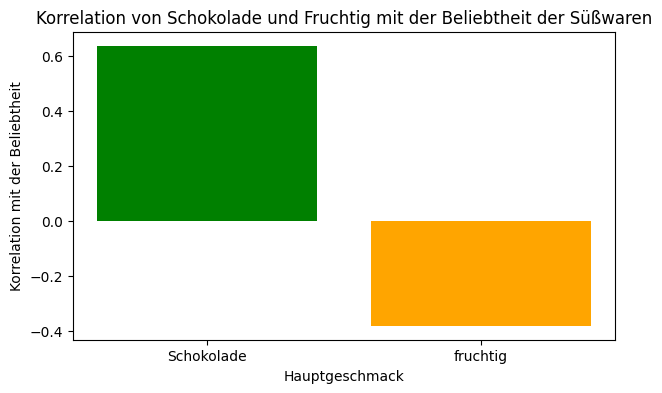

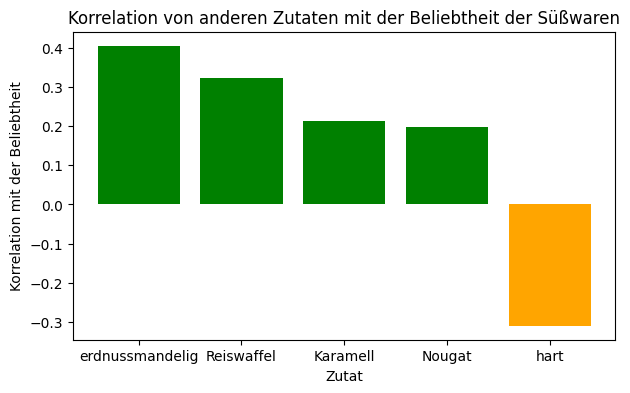

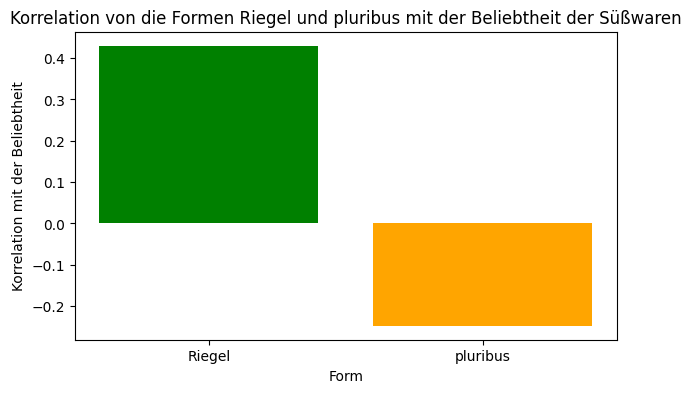

In [79]:
# Generalized function to calculate correlations and create bar plots
def plot_correlations(correlation_data, x_label, y_label, title, colors, filename):
    # Calculate correlations
    correlations = {key: candy_data[feature].corr(candy_data['winpercent']) for key, feature in correlation_data.items()}

    # Sort the correlations by value in descending order (if needed)
    sorted_correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))

    plt.figure(figsize=(7, 4))

    # Create a bar plot
    plt.bar(sorted_correlations.keys(), sorted_correlations.values(), color=colors)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Save the plot
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
    plt.show()

# Define the correlation data and plot for Schokolade and fruchtig
correlation_data_1 = {
    'Schokolade': 'chocolate',
    'fruchtig': 'fruity'
}
plot_correlations(
    correlation_data=correlation_data_1,
    x_label='Hauptgeschmack',
    y_label='Korrelation mit der Beliebtheit',
    title='Korrelation von Schokolade und Fruchtig mit der Beliebtheit der Süßwaren',
    colors=['green', 'orange'],
    filename='my_plot.png'
)

# Define the correlation data and plot for other ingredients
correlation_data_2 = {
    'erdnussmandelig': 'peanutyalmondy',
    'Reiswaffel': 'crispedricewafer',
    'Karamell': 'caramel',
    'Nougat': 'nougat',
    'hart': 'hard'
}
plot_correlations(
    correlation_data=correlation_data_2,
    x_label='Zutat',
    y_label='Korrelation mit der Beliebtheit',
    title='Korrelation von anderen Zutaten mit der Beliebtheit der Süßwaren',
    colors=['green', 'green', 'green', 'green', 'orange'],
    filename='my_plot2.png'
)

# Define the correlation data and plot for the forms
correlation_data_3 = {
    'Riegel': 'bar',
    'pluribus': 'pluribus'
}
plot_correlations(
    correlation_data=correlation_data_3,
    x_label='Form',
    y_label='Korrelation mit der Beliebtheit',
    title='Korrelation von die Formen Riegel und pluribus mit der Beliebtheit der Süßwaren',
    colors=['green', 'orange'],
    filename='my_plot3.png'
)
